NameError: name 'malonaldehyde_032520replicates' is not defined

In [2]:
import pickle

import matplotlib
matplotlib.use('Agg')
import os
import datetime
import numpy as np
import dill as pickle
import random
import sys
np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
#print(os.getcwd())
from codes.experimentclasses.RigidEthanolPCA import RigidEthanolPCA
from codes.otherfunctions.multirun import get_coeffs_reps_tangent
from codes.otherfunctions.multirun import get_grads_reps_pca2_tangent
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch_tangent
from codes.otherfunctions.get_dictionaries import get_atoms_4
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.get_grads_tangent import get_grads_tangent
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
import matplotlib.pyplot as plt
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.geometer.RiemannianManifold import RiemannianManifold
from collections import Counter

/Users/samsonkoelle/manifoldflasso_jmlr


In [3]:
#malonaldehyde_032520replicates.pkl

In [4]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/manifoldflasso_jmlr/untracked_data/embeddings/rigidethanol_032520replicates_fix.pkl' ,
         'rb') as loader:
     replicates = pickle.load(loader)
# supports = {}
# for i in range(nreps):
#     print(i)
#     supports[i] = get_support(replicates[i].coeffs, dim)
#fig, ax = plt.figure(figsize=(15 , 15 ))
#plot_support_2d(supports, experiment.p)
#fig.savefig(folder + '/flasso_support')

In [9]:
rep = replicates[0]

In [10]:
rep.df_M.shape

(100, 2, 3)

In [11]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/manifoldflasso_jmlr/ethanol_032520replicates.pkl' ,
         'rb') as loader:
     replicates = pickle.load(loader)
# supports = {}
# for i in range(nreps):
#     print(i)
#     supports[i] = get_support(replicates[i].coeffs, dim)
#fig, ax = plt.figure(figsize=(15 , 15 ))
#plot_support_2d(supports, experiment.p)
#fig.savefig(folder + '/flasso_support')

In [12]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/manifoldflasso_jmlr/malonaldehyde_032520replicates.pkl' ,
         'rb') as loader:
     replicates = pickle.load(loader)
# supports = {}
# for i in range(nreps):
#     print(i)
#     supports[i] = get_support(replicates[i].coeffs, dim)
#fig, ax = plt.figure(figsize=(15 , 15 ))
#plot_support_2d(supports, experiment.p)
#fig.savefig(folder + '/flasso_support')

In [15]:
# nreps= 25
# dim = 2
# #from codes.otherfunctions.multirun import get_support
# from codes.otherfunctions.multiplot import plot_support_2d

# with open('/Users/samsonkoelle/manifoldflasso_jmlr/toluene_032520replicates.pkl' ,
#          'rb') as loader:
#      replicates = pickle.load(loader)
# # supports = {}
# # for i in range(nreps):
# #     print(i)
# #     supports[i] = get_support(replicates[i].coeffs, dim)
# #fig, ax = plt.figure(figsize=(15 , 15 ))
# #plot_support_2d(supports, experiment.p)
# #fig.savefig(folder + '/flasso_support')

In [17]:
nreps= 5
dim = 2
from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

supports = {}
for i in range(nreps):
    print(i)
    supports[i] = get_support(replicates[i].coeffs, dim)
#fig, ax = plt.figure(figsize=(15 , 15 ))
#plot_support_2d(supports, experiment.p)

0
1
2
3
4


In [22]:
import seaborn as sns
def plot_support_2d(supports, p):
    to_plot = np.zeros((p, p))
    support_indices = np.asarray(list(supports.values()))
    
    for i in range(len(support_indices)):
        if type(support_indices[i]) == np.ndarray:
            to_plot[support_indices[i][0], support_indices[i][1]] += 1
            to_plot[support_indices[i][1], support_indices[i][0]] += 1
    fig, ax = plt.subplots()
    sns.heatmap(to_plot, ax=ax)
    ax.set_xlabel('Dictionary function 1')
    ax.set_ylabel('Dictionary function 2')
    ax.set_title('Frequency of support selection', fontsize  = 16)
    #plt.colorbar(ax)
    #clb.ax.set_title(ax, 'Selection frequency')
    #plt.colorbar('hi')

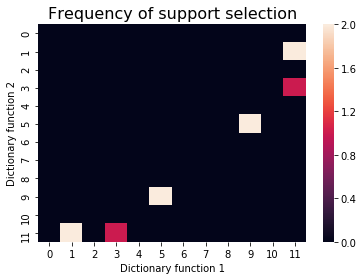

In [26]:
p = 12
%matplotlib inline
plot_support_2d(supports, p)

In [27]:
import plotly

In [28]:
plotly.chord

AttributeError: module 'plotly' has no attribute 'chord'

In [31]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install chord

     |████████████████████████████████| 75 kB 3.9 MB/s eta 0:00:011
  Using cached MarkupSafe-1.1.1-cp35-cp35m-macosx_10_6_intel.whl (18 kB)
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6500 sha256=7eaf4a68a11d378f1e77c6ac7cfb3870afe67dcad666c97004ff9caff7f377b4
  Stored in directory: /Users/samsonkoelle/Library/Caches/pip/wheels/4d/52/5d/687be51a22cef3949df9d5b3919a07ba96736d2eb44fb6f277
Successfully built uuid


In [33]:
import chord
help(chord)

Help on package chord:

NAME
    chord - Chord - Python wrapper around d3-chord

DESCRIPTION
    This package enables the generation of Chord diagrams. They can be saved 
    directly to HTML files or displayed in a Jupyter Notebook output cell.
    
    Copyright 2020, Dr. Shahin Rostami
    http://shahinrostami.com
    https://github.com/shahinrostami/chord
    https://pypi.org/project/chord/

PACKAGE CONTENTS


CLASSES
    builtins.object
        Chord
    
    class Chord(builtins.object)
     |  Methods defined here:
     |  
     |  __init__(self, matrix, names, colors='d3.schemeSet1', opacity=0.8, padding=0.01, width=700, label_color='#454545', wrap_labels=True, margin=0, credit=False, font_size='16px', font_size_large='20px', details=[], details_thumbs=[], thumbs_width=85, thumbs_margin=5, thumbs_font_size=14, popup_width=350, noun='instances', details_separator=', ', divide=False, divide_idx=0, divide_size=0.5, instances=0, verb='occur together in', symmetric=True, title='', a

In [34]:
from chord import Chord

In [38]:
supports

{0: array([5, 9]),
 1: array([ 3, 11]),
 2: array([ 1, 11]),
 3: array([5, 9]),
 4: array([ 1, 11])}

In [39]:
    to_plot = np.zeros((p, p))
    support_indices = np.asarray(list(supports.values()))
    
    for i in range(len(support_indices)):
        if type(support_indices[i]) == np.ndarray:
            to_plot[support_indices[i][0], support_indices[i][1]] += 1
            to_plot[support_indices[i][1], support_indices[i][0]] += 1


In [42]:
to_plot

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [43]:
cp = Chord(to_plot,list(range(p)))

In [45]:
cp.render_html()

In [47]:
cp.matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [48]:
cp.names

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [52]:
help(cp.to_html)

Help on method to_html in module chord:

to_html(filename='out.html') method of chord.Chord instance
    Outputs the generated HTML to a HTML file.



In [53]:
cp.to_html('testingtons.html')

In [66]:
import pandas as pd
# reading data from csv
df = pd.read_csv("/Users/samsonkoelle/Downloads/housing.csv", delimiter=r"\s+", header = None)

In [67]:
matrix = df.corr()
# Replacing negative values with 0’s, as features can be negatively correlated.
matrix[matrix < 0] = 0
# Multiplying all values by 100 for clarity, since correlation values lie b/w 0 and 1.
matrix = matrix.multiply(100).astype(int)
# Converting the DataFrame to a 2D List, as it is the required input format.
matrix = matrix.values.tolist()

In [78]:
names = list(range(14))#["Crime Rate","N-Oxide","Number of rooms","Older buildings","Property Tax","Median Price"]

In [81]:
names

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [83]:
%matplotlib inline
Chord(matrix, names).to_html()

In [ ]:
def plot_support_recovery(to_plot):

    to_plot.flatten()
    for i in range(m):
    plt.scatter()

In [76]:
np.unravel_index([22, 41, 37], (7,6)) np.asarray(matrix).shape

(14, 14)

In [87]:
indices = np.array(list(np.ndindex(to_plot.shape)))

In [102]:
p = 12

In [ ]:
cm

In [198]:
cmap = plt.get_cmap('twilight_shifted',12)

In [199]:
cmap.colors

array([[0.18739228, 0.0771021 , 0.21618875, 1.        ],
       [0.31681648, 0.10389861, 0.46053415, 1.        ],
       [0.36919848, 0.30218932, 0.66946754, 1.        ],
       [0.39993607, 0.51220818, 0.74216845, 1.        ],
       [0.55268451, 0.68863195, 0.77362794, 1.        ],
       [0.80959998, 0.82931897, 0.85064442, 1.        ],
       [0.86265601, 0.80805524, 0.79628267, 1.        ],
       [0.7936756 , 0.61261029, 0.50258161, 1.        ],
       [0.72651123, 0.39261131, 0.33773259, 1.        ],
       [0.58506024, 0.19640737, 0.31305401, 1.        ],
       [0.36605031, 0.09044069, 0.28770775, 1.        ],
       [0.18488036, 0.07942573, 0.21307652, 1.        ]])

In [114]:
major_pal = sns.cubehelix_palette(12,
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)

In [ ]:
#networks = sns.load_dataset("brain_networks", index_col=0, header=[0, 1, 2])


major_lut = dict(zip(map(str, np.unique(major_ontoloogy)), major_pal))

major_colors = pd.Series(major_ontoloogy).map(major_lut)

major_colors.index = means_cast.columns

In [131]:
to_plot

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
indices

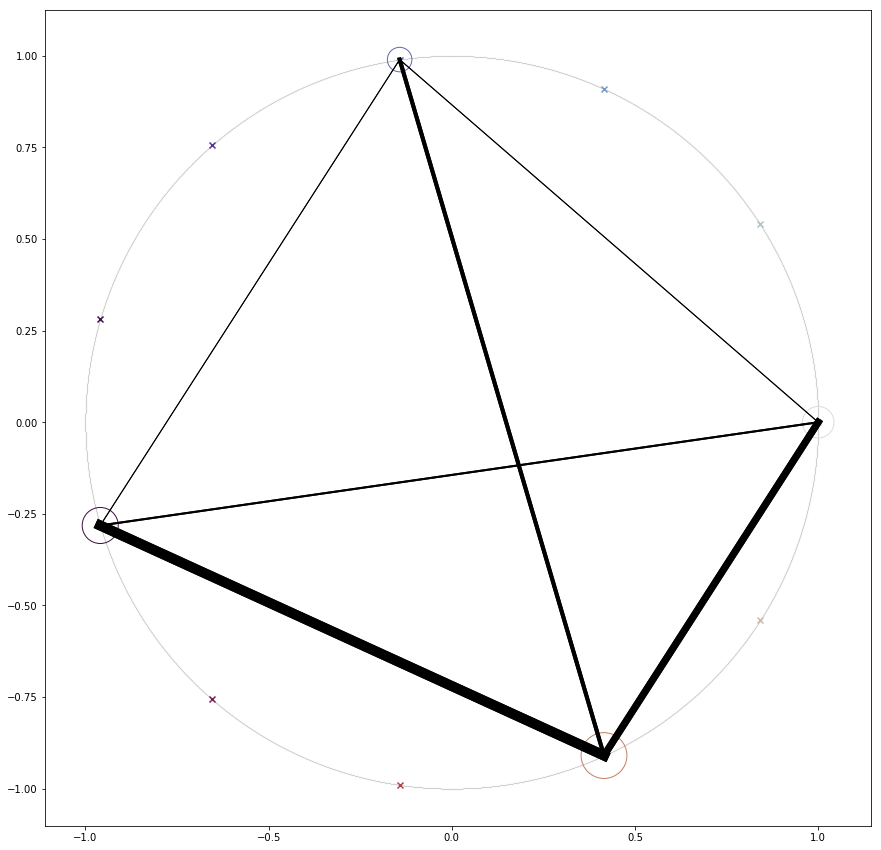

In [166]:
#fig, ax = plt.subplots(figsize = (15,15))
theta = np.linspace(0, 2*np.pi, 10000)

radius = 1.

a = radius*np.cos(theta)
b = radius*np.sin(theta)

figure, axes = plt.subplots(figsize = (15,15))

#axes.plot(a, b, color= 'gray')
axes.scatter(a, b, color = 'gray', s= .1, alpha = .1)#, '-', color = 'gray')#, s= .1, alpha = .1)#, type = 'line')#,cmap=plt.get_cmap('twilight')) #'hsv','twilight_shifted

for j in range(p):
    axes.scatter(np.cos(angles[j]),np.sin(angles[j]),color=cmap.colors[j], marker  = 'x')
    
totes = np.sum(to_plot, axis = 0)

for j in range(p):
    axes.scatter(np.cos(angles[j]),np.sin(angles[j]),color=cmap.colors[j], marker  = 'o', s = 100*totes[j] , facecolors='none')

for i in range(p):
    for j in range(p):
        
        #point1 = [1, 2]
        #point2 = [3, 4]

        x_values = [np.cos(angles[j]), np.cos(angles[i])]
        #gather x-values

        y_values = [np.sin(angles[j]), np.sin(angles[i])]
        #gather y-values

        plt.plot(x_values, y_values,linewidth = to_plot[i,j], color = 'black')
        #axes.axline((x1, y1), (x2, y2))
axes.set_aspect(1)

In [149]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/manifoldflasso_jmlr/untracked_data/embeddings/rigidethanol_032520replicates_fix.pkl' ,
         'rb') as loader:
     replicates = pickle.load(loader)
# supports = {}
# for i in range(nreps):
#     print(i)
#     supports[i] = get_support(replicates[i].coeffs, dim)
#fig, ax = plt.figure(figsize=(15 , 15 ))
#plot_support_2d(supports, experiment.p)
#fig.savefig(folder + '/flasso_support')

In [150]:
nreps= 25
dim = 2
from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

supports = {}
for i in range(nreps):
    print(i)
    supports[i] = get_support(replicates[i].coeffs, dim)
#fig, ax = plt.figure(figsize=(15 , 15 ))
#plot_support_2d(supports, experiment.p)x

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [151]:
    to_plot = np.zeros((p, p))
    support_indices = np.asarray(list(supports.values()))
    
    for i in range(len(support_indices)):
        if type(support_indices[i]) == np.ndarray:
            to_plot[support_indices[i][0], support_indices[i][1]] += 1
            to_plot[support_indices[i][1], support_indices[i][0]] += 1


In [164]:
p

12

In [174]:
angles = np.linspace(0, 2*np.pi, 13)

In [175]:
p

12

1.0 0.0
0.8660254037844387 0.49999999999999994
0.5000000000000001 0.8660254037844386
6.123233995736766e-17 1.0
-0.4999999999999998 0.8660254037844388
-0.8660254037844385 0.5000000000000003
-1.0 1.2246467991473532e-16
-0.8660254037844388 -0.4999999999999998
-0.5000000000000004 -0.8660254037844384
-1.8369701987210297e-16 -1.0
0.4999999999999993 -0.866025403784439
0.8660254037844384 -0.5000000000000004


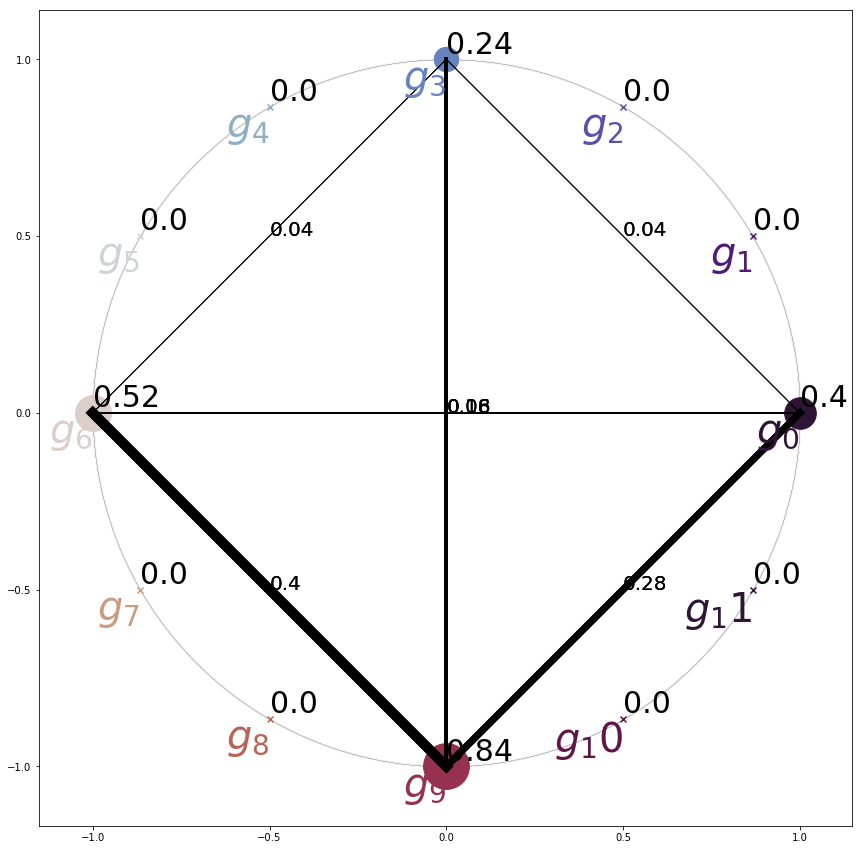

In [200]:
#fig, ax = plt.subplots(figsize = (15,15))
theta = np.linspace(0, 2*np.pi, 10000)

radius = 1.

a = radius*np.cos(theta)
b = radius*np.sin(theta)

figure, axes = plt.subplots(figsize = (15,15))

#axes.plot(a, b, color= 'gray')
axes.scatter(a, b, color = 'gray', s= .2, alpha = .1)#, '-', color = 'gray')#, s= .1, alpha = .1)#, type = 'line')#,cmap=plt.get_cmap('twilight')) #'hsv','twilight_shifted

totes = np.sum(to_plot, axis = 0)

for j in range(p):
    print(np.cos(angles[j]), np.sin(angles[j]))#r'$test \frac{1}{}$'.format(g)
    axes.scatter(np.cos(angles[j]),np.sin(angles[j]),color=cmap.colors[j], marker  = 'x')
    axes.text( x = np.cos(angles[j]),
              y = np.sin(angles[j]),
              s = r"$g_{}$".format(j),color=cmap.colors[j],
              fontdict = {'fontsize' : 40},
              horizontalalignment='right',
     verticalalignment='top')
             
    
    
    axes.text( x = np.cos(angles[j]),y = np.sin(angles[j]),s = str(totes[j] / nreps), fontdict = {'fontsize' : 30},
              horizontalalignment='left',
     verticalalignment='bottom')
    


for j in range(p):
    axes.scatter(np.cos(angles[j]),np.sin(angles[j]),color=cmap.colors[j], marker  = 'o', s = 100*totes[j] )

for i in range(p):
    for j in range(p):
        
        #point1 = [1, 2]
        #point2 = [3, 4]

        x_values = [np.cos(angles[j]), np.cos(angles[i])]
        #gather x-values

        y_values = [np.sin(angles[j]), np.sin(angles[i])]
        #gather y-values

        plt.plot(x_values, y_values,linewidth = to_plot[i,j], color = 'black')

        if to_plot[i,j] > 0 :
            axes.text( x = np.mean(x_values),
              y = np.mean(y_values),
              s = str(to_plot[i,j] / nreps),
              fontdict = {'fontsize' : 20})#,
          #horizontalalignment='left',
        # verticalalignment='bottom')
            
        #axes.axline((x1, y1), (x2, y2))
axes.set_aspect(1)

In [156]:
help(axes.text)

Help on method text in module matplotlib.axes._axes:

text(x, y, s, fontdict=None, withdash=False, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Add text to the axes.
    
    Add the text *s* to the axes at location *x*, *y* in data coordinates.
    
    Parameters
    ----------
    x, y : scalars
        The position to place the text. By default, this is in data
        coordinates. The coordinate system can be changed using the
        *transform* parameter.
    
    s : str
        The text.
    
    fontdict : dictionary, optional, default: None
        A dictionary to override the default text properties. If fontdict
        is None, the defaults are determined by your rc parameters.
    
    withdash : boolean, optional, default: False
        Creates a `~matplotlib.text.TextWithDash` instance instead of a
        `~matplotlib.text.Text` instance.
    
    Returns
    -------
    text : `.Text`
        The created `.Text` instance.
    
    Other Param

In [145]:
to_plot

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [139]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The foll

In [138]:
help(plt.axline)

AttributeError: module 'matplotlib.pyplot' has no attribute 'axline'

In [134]:
totes

array([0., 2., 0., 1., 0., 2., 0., 0., 0., 2., 0., 3.])

In [86]:
help(np.ravel)

Help on function ravel in module numpy.core.fromnumeric:

ravel(a, order='C')
    Return a contiguous flattened array.
    
    A 1-D array, containing the elements of the input, is returned.  A copy is
    made only if needed.
    
    As of NumPy 1.10, the returned array will have the same type as the input
    array. (for example, a masked array will be returned for a masked array
    input)
    
    Parameters
    ----------
    a : array_like
        Input array.  The elements in `a` are read in the order specified by
        `order`, and packed as a 1-D array.
    order : {'C','F', 'A', 'K'}, optional
    
        The elements of `a` are read using this index order. 'C' means
        to index the elements in row-major, C-style order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest.  'F' means to index the elements
        in column-major, Fortran-style order, with the
        first index changing fastest, and the last index

In [55]:
delete = ['ZN', 'INDUS', 'CHAS', 'DIS','RAD','PTRATIO','B','LSTAT']
df.drop(delete, axis=1, inplace=True)

KeyError: "['ZN' 'INDUS' 'CHAS' 'DIS' 'RAD' 'PTRATIO' 'B' 'LSTAT'] not found in axis"

In [56]:
df

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
5,0.08829 12.50 7.870 0 0.5240 6.0120 66...
6,0.14455 12.50 7.870 0 0.5240 6.1720 96...
7,0.21124 12.50 7.870 0 0.5240 5.6310 100...
8,0.17004 12.50 7.870 0 0.5240 6.0040 85...
9,0.22489 12.50 7.870 0 0.5240 6.3770 94...
